# <center> DENİZ BALCI SİMÜLASYON 5.ÖDEVİ</center>

# 1)  Paket Kurulumu ve Ön açıklama

Bütün hücreleri ayrı ayrı veya bütün halde çalıştırabilirsiniz.İlk olarak paketleri yükleyelim.

In [2]:
!pip install scipy
!pip install numpy
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


# Soru1 
## Adaptif kabul red yöntemi nedir açıklayınız ?


<center><img src="img/besinciodev/rejectaccept.png" alt="MarineGEO circle logo" style="height: 500px; width:1000px;"/>

Adaptive kabul red yönteminde ise aşağıdaki gibi gösterebiliriz.



<center><img src="img/besinciodev/adaptive.png" alt="MarineGEO circle logo" style="height: 500px; width:1000px;"/>

Hem eğimi, hemde öneri dağılımınun loglu hali üzerinden üst limiti belirleyebiliyoruz.

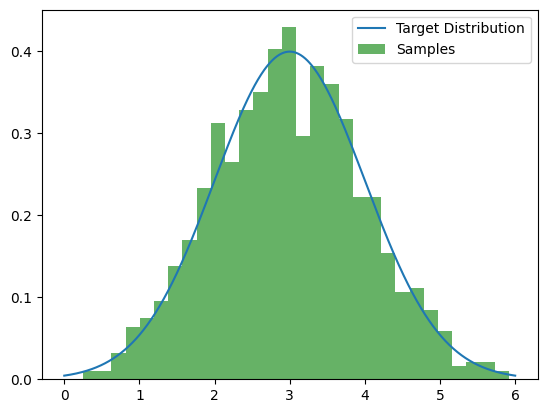

In [8]:
import numpy as np

def target_distribution(x):
    # Hedef dağılımın belirlenmesi, örneğin normal dağılım
    mean = 3
    std_dev = 1
    return np.exp(-0.5 * ((x - mean) / std_dev)**2) / (std_dev * np.sqrt(2 * np.pi))

def sample_from_proposal(proposal_distribution, bounds):
    # Öneri dağılımından bir örnek seçmek için metropolis-hastings yöntemi kullanılıyor.
    x = np.random.uniform(bounds[0], bounds[1])
    y = np.random.uniform(0, proposal_distribution(x))
    if y <= target_distribution(x):
        return x
    return None

def adaptive_rejection_sampling(N, bounds, initial_points):
    # Adaptif reddetme örnekleme algoritması
    samples = []
    support_points = sorted(initial_points)
    
    W = calculate_piecewise_linear(support_points)
    
    while len(samples) < N:
        # Öneri dağılımının oluşturulması
        proposal_distribution = lambda x: np.exp(-W(x))
        
        # Öneri dağılımından örnek alınması
        sample = sample_from_proposal(proposal_distribution, bounds)
        
        if sample is not None:
            samples.append(sample)
            # Reddedilen örneklerin öneri dağılımını güncellemesi
            support_points.append(sample)
            support_points.sort()
        
        # Güncellenmiş öneri dağılımının hesaplanması
        W = calculate_piecewise_linear(support_points)
    
    return samples

def calculate_piecewise_linear(support_points):
    # Parçalı doğrusal fonksiyonun hesaplanması
    slopes = []
    intercepts = []
    
    for i in range(1, len(support_points)):
        x1, x2 = support_points[i-1], support_points[i]
        m = (target_distribution(x2) - target_distribution(x1)) / (x2 - x1)
        b = target_distribution(x1) - m * x1
        slopes.append(m)
        intercepts.append(b)
    
    return lambda x: min(m * x + b for m, b in zip(slopes, intercepts))

# Örnek kullanım
N = 1000  # Kaç tane örnek alınacağı
bounds = (0, 6)  # Örnekleme alanının sınırları
initial_points = [1, 2, 4, 5]  # Başlangıç noktaları

samples = adaptive_rejection_sampling(N, bounds, initial_points)

# Örneklerin görselleştirilmesi
import matplotlib.pyplot as plt

x = np.linspace(bounds[0], bounds[1], 1000)
plt.plot(x, target_distribution(x), label='Target Distribution')
plt.hist(samples, bins=30, density=True, alpha=0.6, color='g', label='Samples')
plt.legend()
plt.show()


### kaynakça

https://lewiscoleblog.com/monte-carlo-methods

https://www.jarad.me/courses/stat615/slides/ARMS/ARMS.pdf

https://e-archivo.uc3m.es/rest/api/core/bitstreams/1c6457a7-6d6b-4fb6-a290-4c3307681417/content

https://vixra.org/pdf/1509.0048v2.pdf  4.sayfa


https://github.com/alumbreras/ARS/blob/master/ars.py